<a href="https://colab.research.google.com/github/pirisc/Background-generator/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [15]:
# Check for GPU
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [16]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"


2.6.0+cu124


## 1. What are 3 areas in industry where computer vision is currently being used?

* **Camera and photo apps** use computer vision to enhance and sort images
* **Modern cars** use computer vision to avoid other cars and stay within lane lines
* **Manufactorers** use computer vision to identify defects in various products
* **Security cameras** use computer vision to detect potential intruders

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

**Overfitting** means creating a model that learns the training set so well that fails to make predictions on new data.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

Some ways to prevent overfitting:
* EarlyStopping callback: it pauses the training phase before the machine learning model learns the noise in the data.
* Data augmentation: is a ML technique that changes the sample data sligthly every time the model processed it. For example, applying transformations such as translations, flipping and rotation to input images.
* Cross-validation: use your initial training data to generate multiple mini train-test splits. Use these splits to tune your model


## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [17]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Setup training data
train_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform= ToTensor()
)

## 6. Visualize at least 5 different samples of the MNIST training dataset.

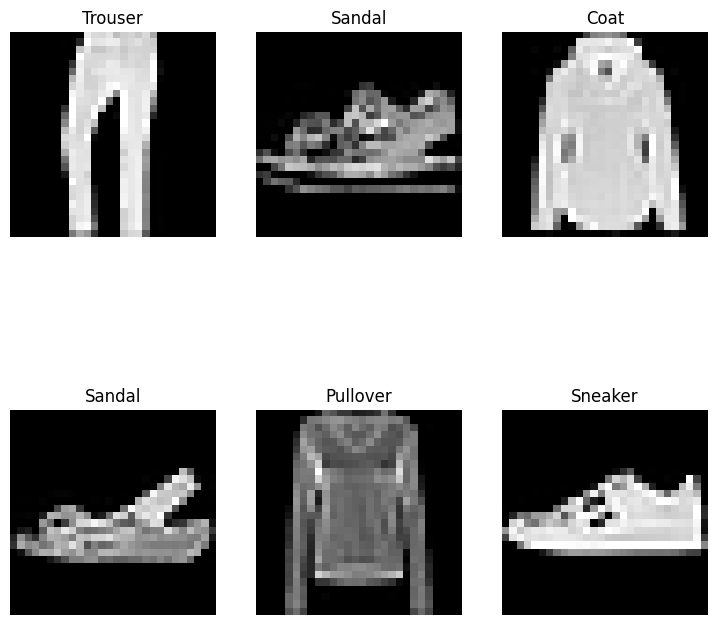

In [18]:
import matplotlib.pyplot as plt

class_names = train_data.classes


# Plot images
fig = plt.figure(figsize = (9,9))
rows, cols = 2 ,3
for i in range(1, rows* cols + 1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img,label = train_data[random_idx]
  fig.add_subplot(rows, cols,i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);


## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [19]:
from torch.utils.data import DataLoader

# Setup the batch size
BATCH_SIZE = 32

# Turn dataset into iterables
train_dataloader = DataLoader(train_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True)
test_dataloader = DataLoader(test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = False)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [20]:
class FashionMNISTModelV0(nn.Module):
  """ Model architecture copying TinyVGG"""
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels= input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2,
                     stride = 2)
    )
    self.block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2, 2)
    )
    self.classifier= nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self,x):
    x = self.block_1(x)
    x = self.block_2(x)
    x = self.classifier(x)
    return x

In [21]:
torch.manual_seed(42)
model_0 = FashionMNISTModelV0(input_shape=1,
                             hidden_units=10,
                             output_shape=len(class_names)).to(device)
model_0

FashionMNISTModelV0(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [22]:
# Download helper_functions
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_function..py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_funtions.py","wb") as f:
    f.write(request.content)

In [23]:
from helper_funtions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),lr=0.1)

In [25]:
# Import tqdm for progress bar
from tqdm.auto import tqdm
from timeit import default_timer as timer

torch.manual_seed(42)
epochs = 5
train_time_start_on_gpu = timer()
X,y = X.to(device), y.to(device)

# Create training and testing loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n----------")
  ### Training
  train_loss, train_acc = 0,0

  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
    # Forward pass
    y_pred = model_0(X)

    # Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred = y_pred.argmax(dim=1))
    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss backward
    loss.backward()

    # Optimizer step
    optimizer.step()


  ### Testing
  test_loss, test_acc = 0,0
  model_0.eval()
  with torch.inference_mode():
    for X, y in test_dataloader:
      test_pred = model_0(X)
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
  print(f"\nTrain loss: {train_loss:.5f} |Train loss: {train_acc:.2f} | Test loss: {test_loss:.5f} | Test acc:{test_acc:.2f}")

train_time_end_on_gpu = timer()
total_train_time = train_time_end_on_gpu - train_time_start_on_gpu
print(f"Total train time: {total_train_time}")


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
----------

Train loss: 1055.02478 |Train loss: 149543.75 | Test loss: 125.37166 | Test acc:26871.88
Epoch: 1
----------

Train loss: 707.11731 |Train loss: 162540.62 | Test loss: 115.41052 | Test acc:27218.75
Epoch: 2
----------

Train loss: 643.84259 |Train loss: 164646.88 | Test loss: 112.32563 | Test acc:27393.75
Epoch: 3
----------

Train loss: 610.78540 |Train loss: 165618.75 | Test loss: 107.88417 | Test acc:27431.25
Epoch: 4
----------

Train loss: 586.57965 |Train loss: 166421.88 | Test loss: 104.72677 | Test acc:27515.62
Total train time: 138.66291164299992


In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm
from timeit import default_timer as timer

torch.manual_seed(42)
epochs = 5
train_time_start_on_gpu = timer()

# Training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch+1}\n----------")

    ### Training
    train_loss, train_acc = 0, 0

    for batch, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)  # Move data to GPU if available
        model_0.train()

        # Forward pass
        y_pred = model_0(X)

        # Calculate the loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()  # Convert tensor loss to scalar

        # Calculate accuracy
        train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1)).item()

        # Optimizer zero grad
        optimizer.zero_grad()

        # Loss backward
        loss.backward()

        # Optimizer step
        optimizer.step()

    # Average train loss and accuracy
    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)

    ### Testing
    test_loss, test_acc = 0, 0
    model_0.eval()

    with torch.inference_mode():
        for X, y in test_dataloader:
            X, y = X.to(device), y.to(device)  # Move data to GPU if available

            test_pred = model_0(X)
            test_loss += loss_fn(test_pred, y).item()  # Convert tensor to scalar
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1)).item()

    # Average test loss and accuracy
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

    print(f"\nTrain loss: {train_loss:.5f} | Train acc: {train_acc:.2f} | Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")

# End training timer
train_time_end_on_gpu = timer()
total_train_time = train_time_end_on_gpu - train_time_start_on_gpu
print(f"Total train time: {total_train_time:.2f} seconds")


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?